# Simple Linear Regression

The notebook aims to study and implement a linear regression model with one variable (simple linear regression model). The diabetes dataset will be used to construct and explain the simple linear regression.


## Acknowledgments

- Used dataset: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html or diabetes from the "sklearn" package



## Importing libraries

In [12]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily
#from sklearn import datasets
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score


## Importing data

In [13]:
# Dataset url
url  = "datasets/diabetes/diabetes.txt"

# Load the dataset
data = np.loadtxt(url,skiprows=1)

# Construct dataframe
ColumnNames = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']
df          = pd.DataFrame(data, columns = ColumnNames)


## Undertanding the dataset

Get a general 'feel' of the dataset

In [14]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [15]:
# Number of predictors/variables/features and obsertations in the dataset
Nr, Nc = df.shape

print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of variables(columns)   = {0:0d}".format(Nc))


Number of observations (rows)  = 442
Number of variables(columns)   = 11


#### Characteristics of the dataset

1. The dataset description
    - Many observations/measurements/recordings of the characteristics/attributes/variables of persons
    - Variables: age, sex, bmi, bp, tc, ... (10 variables)
    - Total numer of observations: 442


2. Description of the predictors/variables/features/attributes (independant variable)
    - AGE: in years
    - SEX: gender
    - BMI: body mass index
    - BP: average blood pressure
    - S1: tc, total serum cholesterol
    - S2: ldl, low-density lipoproteins
    - S3: hdl, high-density lipoproteins
    - S4: tch, total cholesterol / HDL
    - S5: ltg, possibly log of serum triglycerides level
    - S6:  glu, blood sugar level


3. Description of the response (dependant variable)
    - Y: quantitative measure of disease progression one year after baseline

Note:
- In case you uploaded the dataset using sklearn, each of the 10 variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)

In [16]:
# Summary statistics for the variables
df.describe()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [17]:
# Plot pairwise relationships in the dataset
#vars   = ["BMI","BP","S6","Y"]
#dfX    = df[vars]

#g = sns.pairplot(dfX, corner =True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
#plt.show()


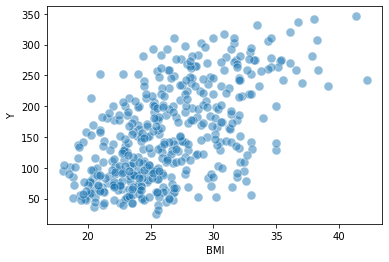

In [18]:
# scatter plot between BMI and disease Y
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.5)
plt.show()


The scatter seems plot shows a linear positive relationship between body mass index $x$ and disease $y$: note that that we can draw a straight line with positive slope which somehow fits the values on chart

In [19]:
# Calculate correlation between variables: use ["BMI","Y"]
df[["BMI","Y"]].corr()


,BMI,Y
BMI,1.00000,0.58645
Y,0.58645,1.00000


This shows a correlation between variables of 0.59. See how the disease $Y$ is positive correlated with $BMI$.


## Problem description

We have the data $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ and we want to fit a model to explain and predict $y$ based on $x$:

$$y = f(x)$$

Two main objectives of model fitting:
- Making inference about relationships between variables in a given data set (commonly used in statistical analysis)
- Making predictions/forecasting future outcomes, based on models estimated using historical data (commonly used in machine learning)

## Description of the linear model

We have the data $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ and we want to construct a linear model to explain and predict $y$ based on $x$, that is:

$$y = \beta_0 + \beta_1 \cdot x$$

According to our data, the dependent variable or response $y$ is the **disease** while the independent variable or predictor $x$ is the **BMI**, Therefore the linear model is simply:

$$disease = \beta_0 + \beta_1 \cdot BMI$$

This is a simple linear model, where $y$ is the dependent variable, $x$ is the independet variable and 
$\beta_0$ (intercept) and $\beta_1$ (slope) are the unknown model parameters (or coefficients) that will be estimated from the data.

- $y$: response 
- $x$: predictor/variable/feature
- $\beta_1$: coefficient (slope)
- $\beta_0$: intercept

Note: the linear equation is attributed to René Descartes (AD 1596-1650), Father of Analytic Geometry.

Let's see now scatter the plot of our data and some plausible linear models (i.e., straight lines) that explain such data

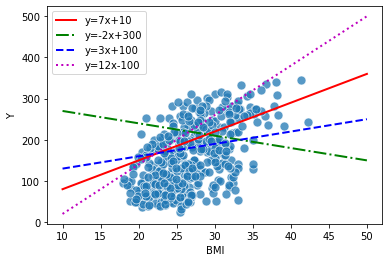

In [20]:
# Construct some straigh lines (potential models) for the data
xl  = np.linspace(10,50,100)
yl1 =  7*xl + 10
yl2 = -3*xl + 300
yl3 =  3*xl + 100
yl4 =  12*xl - 100

# Scatter plot of the data and some plausible linear models
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl1, '-r' , label='y=7x+10'    , linewidth=2)
plt.plot(xl, yl2, '-.g', label='y=-2x+300'  , linewidth=2)
plt.plot(xl, yl3, '--b', label='y=3x+100'   , linewidth=2)
plt.plot(xl, yl4, ':m' , label='y=12x-100'  , linewidth=2)
plt.legend()
plt.show()


The question is then: Which straight line (i.e., $\beta_0$ and $\beta_1$) should we choose based on the data? We choose the straight line (i.e., $\beta_0$ and $\beta_1$) where total sum of error is minimum.

Our task is to obtain **coefficient estimates** ($\hat{\beta_0} $ and $\hat{\beta_1}$) such that the linear model fits the available data well, that is, so that $y_i \approx \hat{\beta_0} + \hat{\beta_1} x_i $ for $i=1,2,...,n$

To do so, we use the **least squares** criterion.

Let's consider again our observations and a plausible linear model.

For the i-th observtion $x_i$ (height):

- $y_i$ is the observed (weight) value

- $\hat{y_i}$ is the predicted (weight) value

Clearly, there is an error (or residual) between the observed response value $y_i$ and the predicted response $\hat{y_i}$

We define this error or residual simply as $e_i = y_i - \hat{y_i}$

Let's see $e_i$ in the plot:

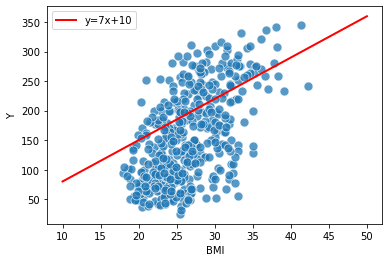

In [21]:
# Construct a straigh line (potential model) for the data
xl = np.linspace(10,50,100)
yl =  7*xl + 10

# Scatter plot of the data and a possible linear model
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl, '-r' , label='y=7x+10'  , linewidth=2)
plt.legend()
plt.show()

# NOTE: 
# - select a observed point $(x_i,y_i)$ 
# - identify and plot the predicted (weight) value $\hat{y_i}$
# - identify and plot the residual $e_i$


Again:

- Notice that $y_i$ is the observed response value and $\hat{y_i}$ is the predicted response, both on $x_i$

- There is an error or residual $e_i$ between the observed response value $y_i$ and the predicted response $\hat{y_i}$

Therefore, we must choose the straight line (i.e., $\hat{\beta_0}$ and $\hat{\beta_1}$ ) where the total residual is minimum.

In practice, we use and minimize the residual sum of squares (**RSS**) which is defined as:

$$RSS = \sum_{i=1}^{n}e_{i}^{2} = \sum_{i=1}^{n}(y_i - \hat{y_i})^{2} $$

NOTE: Why do we use RSS instead of RS?


## Selection of a plausible linear model using the RRS

Again, let's plot out data and four plausible linear models that explain such data

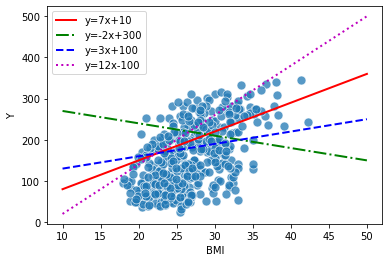

In [22]:
# Construct some straigh lines (potential models) for the data
xl  = np.linspace(10,50,100)

model1_b0, model1_b1    =  10,  7
model2_b0, model2_b1    = 300, -3
model3_b0, model3_b1    = 100,  3
model4_b0, model4_b1    =-100, 12

yl1  =  model1_b0 + model1_b1*xl
yl2  =  model2_b0 + model2_b1*xl
yl3  =  model3_b0 + model3_b1*xl
yl4  =  model4_b0 + model4_b1*xl

# Scatter plot of the data and some plausible linear models
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl1, '-r' , label='y=7x+10'    , linewidth=2)
plt.plot(xl, yl2, '-.g', label='y=-2x+300'  , linewidth=2)
plt.plot(xl, yl3, '--b', label='y=3x+100'   , linewidth=2)
plt.plot(xl, yl4, ':m' , label='y=12x-100'  , linewidth=2)
plt.legend()
plt.show()


Let's decide for the linear model with the lowest RSS

In [23]:
# RSS for model 1
model1_yhat  = model1_b0 + model1_b1*df.BMI.values
model1_RSS   = np.sum( (df.Y.values-model1_yhat)**2 )

# RSS for model 2
model2_yhat  = model2_b0 + model2_b1*df.BMI.values
model2_RSS   = np.sum( (df.Y.values-model2_yhat)**2 )

# RSS for model 3
model3_yhat  = model3_b0 + model3_b1*df.BMI.values
model3_RSS   = np.sum( (df.Y.values-model3_yhat)**2 )

# RSS for model 4
model4_yhat  = model4_b0 + model4_b1*df.BMI.values
model4_RSS   = np.sum( (df.Y.values-model4_yhat)**2 )

# Print results
print("RSS model 1: {0:0.2f}".format(model1_RSS))
print("RSS model 2: {0:0.2f}".format(model2_RSS))
print("RSS model 3: {0:0.2f}".format(model3_RSS))
print("RSS model 4: {0:0.2f}".format(model4_RSS))


RSS model 1: 2607816.65
RSS model 2: 5315498.65
RSS model 3: 2492020.65
RSS model 4: 3578223.40


Based on the RSS values of all testes models, we choose model 1

How to choose the linear model with the minimum RSS?

The least squares approach estimates the coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimizes the **RSS**.

To minimize the **RSS**, we take the its derivative and set it equal to zero to solve for critical $\beta_0$ and $\beta_1$. Doing the math yield to:

$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i – \bar{x}) (y_i – \bar{y})} {\sum_{i=1}^{n} (x_i – \bar{x})^2}$$

$$\hat{\beta}_0 = \bar{y} – \hat{\beta}_1 \bar{x}$$

where, $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$ is the sample mean.

## Fitting the linear regression

Calculate the coefficients of the linear reggresion model manually

In [24]:
# Calcular the coefficient estimates
den = df.BMI.values - df.BMI.mean()
den = den**2
den = np.sum(den)

num = ( df.BMI.values-df.BMI.mean() ) * ( df.Y.values-df.Y.mean() )
num = np.sum(num)

b1  = num/den
b0 = df.Y.mean() - b1*df.BMI.mean()

# Print coefficients value
print("The intercep b0 is: {0:1.3f}".format(b0))
print("The slope b1 is: {0:1.3f}".format(b1))


The intercep b0 is: -117.773
The slope b1 is: 10.233


What is the RSS for this model?

In [25]:
# Compute the RSS
yhat  = b0 + b1*df.BMI.values
RSS   = np.sum( (df.Y.values-yhat)**2 )

# Print the RSS value
print("The RSS is: {0:1.3f}".format(RSS))


The RSS is: 1719581.811


Note: this is the minimum RSS value for any model coefficients

## Fitting the linear regression model using sklearn

Fitting the linear reggresion model using sklearn

In [26]:
# Import sklearn linear_model
from sklearn import linear_model

# Create linear regression object
regmodel = linear_model.LinearRegression()

# Train the model
regmodel.fit(df[["BMI"]], df[["Y"]])


LinearRegression()

In [27]:
# Model intercept
#regmodel.intercept_
#print("Intercept: \n", regmodel.intercept_)

# Get model intercept
b0 = regmodel.intercept_
print("The intercep b0 is", b0)


The intercep b0 is [-117.77336657]


In [28]:
# Model coefficient (slope)
#regmodel.coef_
#print("Coefficients: \n", regmodel.coef_)

# Get model coefficient (slope) 
b1 = regmodel.coef_[0]
print("The slope b1 is", b1)


The slope b1 is [10.23312787]


## Understanding the model

The estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ were calculated from the data.

NOTE: the slope is not zero which means that for a new observation of **BMI** $x$ we can make a guess of the **disease** $y$

The final linear regression model is:

$$y = \beta_0 + \beta_1 \cdot BMI $$

$$y = -117.77 + 10.23 \cdot BMI $$

Interpretation: 
- The value of the slope coefficient $\beta_1$ of 10.23 indicates that for a unit increase in BMI, there is an increase of 10.23 in disease progression.

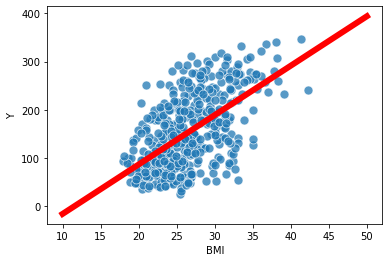

In [29]:
# Calculate data for the linear model
yl =  b0 + b1*xl

# Scatter plot of the data and the linear model with the best fit
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)
plt.show()


The straight line can be seen in the plot, that best minimize the residual sum of squares (RSS) between the observed responses in the dataset $y_i$, and the responses predicted by the linear approximation $\hat{y_i}$.

## Assessing the accuracy of the coefficient estimates

- Standard error

- Residual standard error (RSE)

- Confidence interval

- Hypothesis test
    - H0 : There is no relationship between $x$ and $y$ ($\beta_1 = 0$)
    - Ha : There is some relationship between $x$ and $y$ ($\beta_1 \neq 0$)
    - t-statistic and p-value

These concepts will not be covered here. For more details explore the concepts of "Statistical Modelling" and "Fitting Statistical Models to Data".


## Assessing the accuracy of the model: the $R^2$ statistic

The question is now: How well does the model fit the data?

To answer to this question we use the $R^2$ statistic, a measure of the linear relationship between $x$ and $y$ that indicates the proportion of variance explained. The $R^2$ statistic always takes on a value between 0 and 1, and is independent of the scale of y



The $R^2$ is a statistical measure:
- of how well the regression predictions approximate the real data points
- that indicates the proportion of the variation in the dependent variable ($y$) that is predictable from (explained by) the independent variable(s) ($x$).



$R^2$ ranges between 0 and 1:
- The best possible $R^2$ score is 1 and indicates that the predictions $\hat{y_i}$ perfectly fit the observed responsed $y_i$.
- The worst possible $R^2$ score is 0 and indicates that the predictions $\hat{y_i}$ disregards the input $x_i$.

The coefficient of determination $R^2$ is computed as $R^2 = (TSS-RSS)/TSS = 1 - RSS/TSS$, where

- $TSS$ is the total sum of squares, $\sum_{i=1}^{n}(y_i - \bar{y})^{2}$, measures the total variance in the response y, and can be thought of as the amount of variability inherent in the response before the regression is performed. 
- $RSS$ is the residual sum of squares, $\sum_{i=1}^{n}(y_i - \hat{y_i})^{2}$, measures the amount of variability that is left unexplained after performing the regression.

Hence, $TSS−RSS$ measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in$y$ that can be explained using $x$.

A $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response is
explained by the regression. A $R^2$ statistic close to 0 indicates that the regression does not explain much of the variability in the response.

In the best case, $R^2=1$, the predicted values $\hat{y_i}$ exactly match the observed values $y_i$, which results in $RSS = 0$.

In the worst case, $R^2=0$, we have a constant model that always predicts the expected (mean) value of $y$, that is $\bar{y}$, disregarding the input data $x$. In other words, a constant model always predicts $\bar{y}$ irrespective of the independent variable $x$.

Note: see *.ipynb to undertand in detail the concepts behind the coefficient of determination $R^2$

In [30]:
# Calculate the R2 statistic (manually)
yhat  = b0 + b1*df.BMI.values
RSS   = np.sum( (df.Y.values-yhat)**2 )
TSS   = np.sum( (df.Y.values-df.Y.mean())**2 )

R2 = 1 - RSS/TSS
R2


0.3439237602253802

In [31]:
# Calculate the R2 statistic
regmodel.score(df[["BMI"]], df[["Y"]])


0.3439237602253802

Accoording to this $R^2$ value:

- The 34% of the variation of the **disease** $y$ is explained the **BMI** $x$
- The $R^2$ score of 0.34 implies that 34% of the variability of the dependent variable **disease** $y$ has been accounted for the independent variable **BMI** $x$, while the remaining 66% of the variability is still unaccounted for.

## Make predictions

Make predictions using a new $x$

In [32]:
# Define one input x and compute the output using regmodel
xnew = 23
ynew = regmodel.predict([[xnew]])
ynew


array([[117.58857445]])

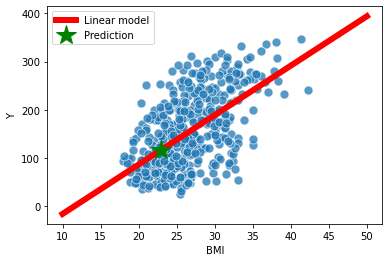

In [33]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)
plt.plot(xnew, ynew, 'g*', label='Prediction' , markersize=20)
plt.legend()
plt.show()


Make predictions using several predictors $x$


In [34]:
# Define several inputs x and compute the output using regmodel
xn = np.array([[16.3, 27.2, 41.3]]).T
yn = regmodel.predict(xn)


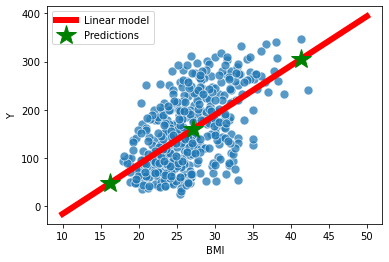

In [35]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.plot(xl, yl, '-r', label='Linear model', linewidth=6)
plt.plot(xn, yn, 'g*', label='Predictions' , markersize=20)
plt.legend()
plt.show()


Define a function to make predictions

In [36]:
# Function to predict
def PredictDiseaseProgression(BMI):
    return -117.77336657 + 10.23312787*BMI


In [38]:
# Predict a value
Xnew = 23
Ynew = PredictDiseaseProgression(Xnew)
Ynew


117.58857444000002

# Final remarks


- Linear regresion models

    - Supervised learning model (Parametric model with no hyperparameters)

    - Used to explain linear relationships and predict responses

    - Simple linear regression: 
        - Only one independent variable $x$
        - Relationship between $x$ and $y$ is described by a linear function
        - Changes in $y$ are assumed to be linearly related to changes in $x$

    - To estimate the linear model coefficients from data
        - We minimize the residual sum of squares (RSS)
        - The least squares approach is used to estimate the model coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$
        - To minimize the RSS, we take the its derivative and set it equal to zero


- Pending concepts to be studied:
    - How significant are the estimated coefficients
    - How to make predictions using a unseen test dataset and compute performance metrics
    - Multiple linear regression

# Activity 1: work with the deadetes dataset

Use the **diabetes** dataset to:

1. Build a linear model to predict
    - Disease progression ($y$) based on blood pressure ($x$) 
    - Disease progression ($y$) based on blood sugar level ($x$) 
    - Which one of the independent variables (body mass indez, blood pressure, blood sugar level) provides the higest linear relationship with the dependent variable (disease progression)? Does any of the two analized independet variables not explain disease progression? Elaborate and explain your responses
    

# Activity 2: work with the cartwheel dataset

Use the **cartwheel** dataset to:

1. Build a linear model to predict
    - Wingspan distance ($y$) based on height ($x$) 
    - Wingspan distance ($y$) based on age ($x$) 
    - Which one of the independent variables (height and age) provides the higest linear relationship with the dependent variable (wingspan)? Does any of the two analized independet variables not explain wingspan? Elaborate and explain your responses


2. Build a linear model to predict
    - Cartwheel distance ($y$) based on height ($x$) 
    - Cartwheel distance ($y$) based on wingspan ($x$) 
    - Which one of the independent variables (height and age) provides the highest linear relationship with the dependent variable (cartwheel distance)? Does any of the two analized independet variables not explain cartwheel distance? Elaborate and explain your responses


3. Build a linear model to predict
    - Wingspan distance ($y$) based on height ($x$) using only the observations for gender F
    - Wingspan distance ($y$) based on height ($x$) using only the observations for gender M
    - Is there a different linear relationship according to gender? Elaborate and explain your responses


4. Think about predicting the cartwheel distance using two or more independent variables such as height and wingspan ($x_1, x_2, ...$)
    - Define and explain such  mathematical linear model. Explain your response.